In [1]:
import csv
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set_style('ticks')
pd.set_option('display.max_columns', None)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Introduction and problem statement
<hr>

This project analyzes a comprehensive housing dataset from Ames, Iowa, USA ([source](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)). Homeowners often overspend on remodeling projects, which can decrease the return on their investment when selling their home. Conversely, potential buyers want to maximize the value of their home purchase within their budget. This project aims to address these concerns by investigating the following questions:

- What features contribute the most and the least to a house's value?
- Given a set of features, what is the expected selling price of a house?
- Given a budget, what houses are affordable?

To answer these questions, various linear regression models were fitted to the housing data to identify the most and least impactful features. The performance of the models will be evaluated using the R2 metric, which measures how well the model can explain the variance in the dataset.

## Table of contents

1. [Introduction and problem statement](#Introduction-and-problem-statement)
2. [Null Values](#Null-values)
3. [Feature distributions](#Feature-distributions)
4. [Closer examinations](#Close-examinations)
5. [Correlations](#Correlations)

In [2]:
# import train
train = pd.read_csv("data/train.csv")

# make columns lowercase and remove spaces
train.columns = train.columns.str.lower()
train.columns = train.columns.str.replace(' ', '')

print(train.columns)

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

In [3]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [4]:
train.head()

id  mssubclass mszoning  lotfrontage  lotarea street alley lotshape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  landcontour utilities lotconfig landslope neighborhood condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  condition2 bldgtype housestyle  overallqual  overallcond  yearbuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   yearremodadd roofstyle roofmatl exterior1st exterior2nd masvnrtype  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   masvnrarea exterqual extercond foundation bsmtqual bsmtcond bsmtexposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  bsmtfintype1  bsmtfinsf1 bsmtfintype2  bsmtfinsf2  bsmtunfsf  totalbsmtsf  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  heating heatingqc centralair electrical  1stflrsf  2ndflrsf  lowqualfinsf  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   grlivarea  bsmtfullbath  bsmthalfbath  fullbath  halfbath  bedroomabvgr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   kitchenabvgr kitchenqual  totrmsabvgrd functional  fireplaces fireplacequ  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
def data_summaries(df):
    """
    Prints summaries for each column in a given DataFrame.

    For string columns, the function prints the count of unique values.

    For numerical columns, the function prints the percentage of zeros in the column.
    If the percentage of zeros is greater than or equal to 50%, the function prints
    the percentage of zeros and the number of zero values in the column. Otherwise,
    the function prints only the percentage of zeros.
     
    df (pandas.DataFrame): A pandas DataFrame to summarize.
    """
    for col in df.columns:
        print(f"------ {col} ------")
        if df[col].dtype == np.object:
            print(df[col].value_counts())
        elif len(df[df[col] == 0]) >= 731:
            print(f"lots of zeros: {round((len(df[df[col] == 0]) / 1460) * 100)}% \nno. zeros: {len(df[df[col] == 0])}")
        else:
            print(f"zeros: {round((len(df[df[col] == 0]) / 1460) * 100)}%")
    
data_summaries(train)

------ id ------
zeros: 0%
------ mssubclass ------
zeros: 0%
------ mszoning ------
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: mszoning, dtype: int64
------ lotfrontage ------
zeros: 0%
------ lotarea ------
zeros: 0%
------ street ------
Pave    1454
Grvl       6
Name: street, dtype: int64
------ alley ------
Grvl    50
Pave    41
Name: alley, dtype: int64
------ lotshape ------
Reg    925
IR1    484
IR2     41
IR3     10
Name: lotshape, dtype: int64
------ landcontour ------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: landcontour, dtype: int64
------ utilities ------
AllPub    1459
NoSeWa       1
Name: utilities, dtype: int64
------ lotconfig ------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: lotconfig, dtype: int64
------ landslope ------
Gtl    1382
Mod      65
Sev      13
Name: landslope, dtype: int64
------ neighborhood ------
NAmes      225
CollgCr    150
OldTown    113
Edwards    100

## Summary statistics
<hr>

The dataset contains information on 1460 houses constructed between 1872 and 2010 (`yearbuilt`). The `grlivarea` variable, representing the living area, had an average size of 1515 square feet (sf) with a standard deviation of 500 sf. The smallest house in the dataset had a living area of 334 sf, while the largest was 5642 sf.

For houses with basements, the `totalbsmtsf` variable had an average area of 1057 sf with a standard deviation of 449 sf. The smallest basement area was 0 sf, indicating houses without basements, while the largest was 6110 sf.

The `garagearea` variable, representing the garage area, had an average size of 473 sf with a standard deviation of 216 sf. The smallest garage was 0 sf, indicating houses without a garage, while the largest was 1418 sf, which was even bigger than the smallest house.

On average, the houses had 6.52 rooms (`totrmsabvgrd`). The number of rooms in the smallest house was 2, while the largest house had 14.

Finally, the average sale price (`saleprice`) of the houses was \\$180,921 (presumably in US dollars) with a standard deviation of \\$79,442. The cheapest house sold during this period was \\$34,900, while the most expensive was \\$755,000.

In [6]:
train.describe().T

count           mean           std      min        25%  \
id             1460.0     730.500000    421.610009      1.0     365.75   
mssubclass     1460.0      56.897260     42.300571     20.0      20.00   
lotfrontage    1201.0      70.049958     24.284752     21.0      59.00   
lotarea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
overallqual    1460.0       6.099315      1.382997      1.0       5.00   
overallcond    1460.0       5.575342      1.112799      1.0       5.00   
yearbuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
yearremodadd   1460.0    1984.865753     20.645407   1950.0    1967.00   
masvnrarea     1452.0     103.685262    181.066207      0.0       0.00   
bsmtfinsf1     1460.0     443.639726    456.098091      0.0       0.00   
bsmtfinsf2     1460.0      46.549315    161.319273      0.0       0.00   
bsmtunfsf      1460.0     567.240411    441.866955      0.0     223.00   
totalbsmtsf    1460.0    1057.429452    438.705324      0.0     795.75   
1stflrsf       1460.0    1162.626712    386.587738    334.0     882.00   
2ndflrsf       1460.0     346.992466    436.528436      0.0       0.00   
lowqualfinsf   1460.0       5.844521     48.623081      0.0       0.00   
grlivarea      1460.0    1515.463699    525.480383    334.0    1129.50   
bsmtfullbath   1460.0       0.425342      0.518911      0.0       0.00   
bsmthalfbath   1460.0       0.057534      0.238753      0.0       0.00   
fullbath       1460.0       1.565068      0.550916      0.0       1.00   
halfbath       1460.0       0.382877      0.502885      0.0       0.00   
bedroomabvgr   1460.0       2.866438      0.815778      0.0       2.00   
kitchenabvgr   1460.0       1.046575      0.220338      0.0       1.00   
totrmsabvgrd   1460.0       6.517808      1.625393      2.0       5.00   
fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
garageyrblt    1379.0    1978.506164     24.689725   1900.0    1961.00   
garagecars     1460.0       1.767123      0.747315      0.0       1.00   
garagearea     1460.0     472.980137    213.804841      0.0     334.50   
wooddecksf     1460.0      94.244521    125.338794      0.0       0.00   
openporchsf    1460.0      46.660274     66.256028      0.0       0.00   
enclosedporch  1460.0      21.954110     61.119149      0.0       0.00   
3ssnporch      1460.0       3.409589     29.317331      0.0       0.00   
screenporch    1460.0      15.060959     55.757415      0.0       0.00   
poolarea       1460.0       2.758904     40.177307      0.0       0.00   
miscval        1460.0      43.489041    496.123024      0.0       0.00   
mosold         1460.0       6.321918      2.703626      1.0       5.00   
yrsold         1460.0    2007.815753      1.328095   2006.0    2007.00   
saleprice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
id                730.5    1095.25    1460.0  
mssubclass         50.0      70.00     190.0  
lotfrontage        69.0      80.00     313.0  
lotarea          9478.5   11601.50  215245.0  
overallqual         6.0       7.00      10.0  
overallcond         5.0       6.00       9.0  
yearbuilt        1973.0    2000.00    2010.0  
yearremodadd     1994.0    2004.00    2010.0  
masvnrarea          0.0     166.00    1600.0  
bsmtfinsf1        383.5     712.25    5644.0  
bsmtfinsf2          0.0       0.00    1474.0  
bsmtunfsf         477.5     808.00    2336.0  
totalbsmtsf       991.5    1298.25    6110.0  
1stflrsf         1087.0    1391.25    4692.0  
2ndflrsf            0.0     728.00    2065.0  
lowqualfinsf        0.0       0.00     572.0  
grlivarea        1464.0    1776.75    5642.0  
bsmtfullbath        0.0       1.00       3.0  
bsmthalfbath        0.0       0.00       2.0  
fullbath            2.0       2.00       3.0  
halfbath            0.0       1.00       2.0  
bedroomabvgr        3.0       3.00       8.0  
kitchenabvgr        1.0       1.00       3.0  
t

# Null values
<hr> 

The dataset comprises 19 columns, each with a varying number of null values ranging from 1 to 1453.

Upon closer inspection of the categorical columns and their unique values compared to the data dictionary, it appears that the null values represent houses that lack specific features such as a garage, pool, or fireplace. Similarly, the missing values in certain numerical columns indicate houses without a masonry veneer, resulting in null values for the masvnrarea variable. To address this, the nulls in the categorical columns will be filled with "None", and those in numerical columns will be filled with 0.

Additionally, some columns contain only 1 to 8 null values, which are likely recording errors. As a result, the rows with these null values will be dropped from the dataset.

In [7]:
# print count of nulls for columns containing nulls
nulldf = pd.DataFrame(train.isnull().sum(), columns = ['nullcount'])
nulldf = nulldf[nulldf['nullcount'] != 0]
print(nulldf.shape)
nulldf

(19, 1)


nullcount
lotfrontage         259
alley              1369
masvnrtype            8
masvnrarea            8
bsmtqual             37
bsmtcond             37
bsmtexposure         38
bsmtfintype1         37
bsmtfintype2         38
electrical            1
fireplacequ         690
garagetype           81
garageyrblt          81
garagefinish         81
garagequal           81
garagecond           81
poolqc             1453
fence              1179
miscfeature        1406

In [8]:
train.alley.value_counts()

Grvl    50
Pave    41
Name: alley, dtype: int64

In [9]:
train.bsmtqual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: bsmtqual, dtype: int64

In [10]:
train.fireplacequ.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: fireplacequ, dtype: int64

In [11]:
train.garagequal.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: garagequal, dtype: int64

In [12]:
train.poolqc.value_counts()

Gd    3
Ex    2
Fa    2
Name: poolqc, dtype: int64

In [13]:
# there are 8 rows with missing values in masvnrtype and masvnrarea
# these correspond to the 8 missing values in both columns
print(train[train[['masvnrtype','masvnrtype']].isnull().any(axis=1)][['masvnrtype','masvnrtype']].shape)
train[train[['masvnrtype','masvnrtype']].isnull().any(axis=1)][['masvnrtype','masvnrtype']]

(8, 2)


masvnrtype masvnrtype
234         NaN        NaN
529         NaN        NaN
650         NaN        NaN
936         NaN        NaN
973         NaN        NaN
977         NaN        NaN
1243        NaN        NaN
1278        NaN        NaN

# Feature distributions
This section examines the distribution of each of the features in the dataset, using distribution plots (including histograms) and probability plots.

Distributions
As shown in the summary above as well as the graphs below in this section, numerous columns have large amounts of 0s or are dominated by a single value (>80% in both cases), and are extremely left- or right-skewed. The most skewed columns are miscval, poolarea, and 3ssnporch (according to this table below.

Distribution and probability plots (numerical variables)
Most of the numerical features are not normally distributed at this point - the distribution plots are not bell-shaped (as opposed to how they would look like if they were normal - as shown by the black curve in each plot) and the probability plots are not aligned with the expected quantiles. A number of features also have a lot of zeros, e.g. bsmtfinsf1, and bsmtfinsf2.

In [14]:
def dist_plots(df, list_of_columns):
    nrows = len(list_of_columns)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, nrows*3.5))
    ax = ax.ravel()
    for i, col in enumerate(list_of_columns):
        sns.distplot(df[col], ax=ax[i*2], fit=stats.norm)
        ax[i*2].set_title(f'{col} distribution plot', fontsize=14)
        ax[i*2].tick_params(labelsize=12)
        ax[i*2].set_xlabel(col, fontsize=14)

        sns.boxplot(df[col], width=0.2, ax=ax[i*2+1], orient='h')
        ax[i*2+1].set_title(f'{col} box plot', fontsize=14)
        ax[i*2+1].tick_params(labelsize=12)
        ax[i*2+1].set_xlabel(col, fontsize=14)
    plt.tight_layout()

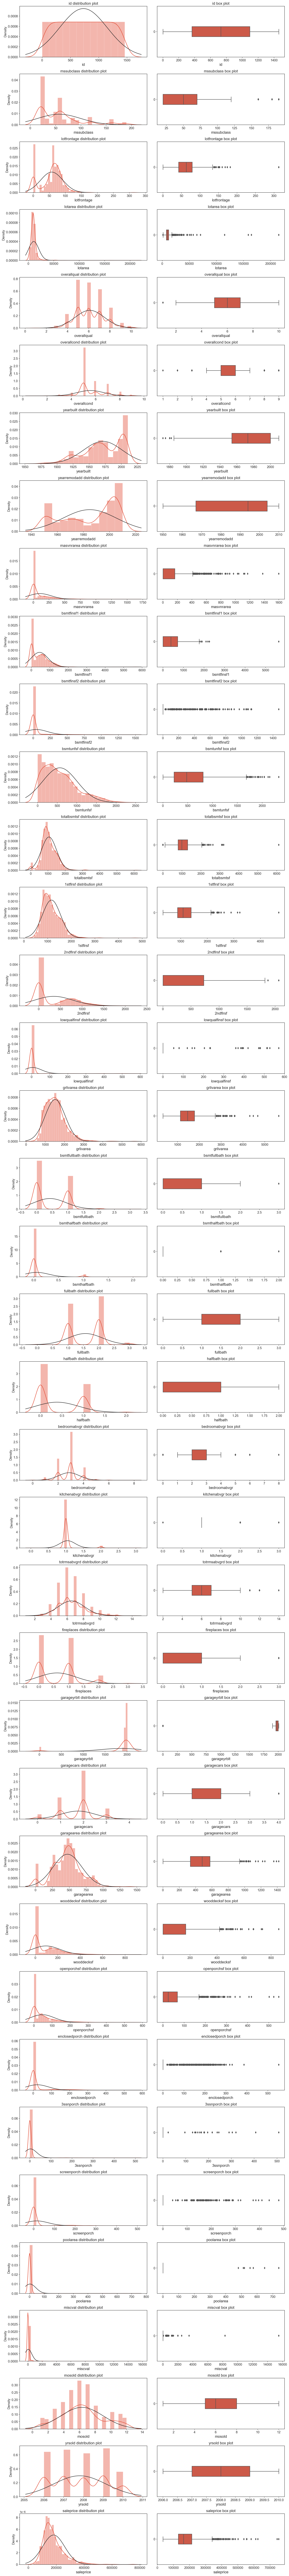

In [15]:
# list with only numerical columns
col_numerical = [col for col in train.columns if train[col].dtype != np.object]

# list with only categorical columns
col_categorical = [col for col in train.columns if col not in col_numerical]

# preliminary filling of null values so the features can be visualised
train_copy = train.copy()
for col in col_numerical:
    train_copy[col] = train_copy[col].fillna(0.0)
for col in col_categorical:
    train_copy[col] = train_copy[col].fillna('None')
    
# plot distributions
dist_plots(train_copy,col_numerical)

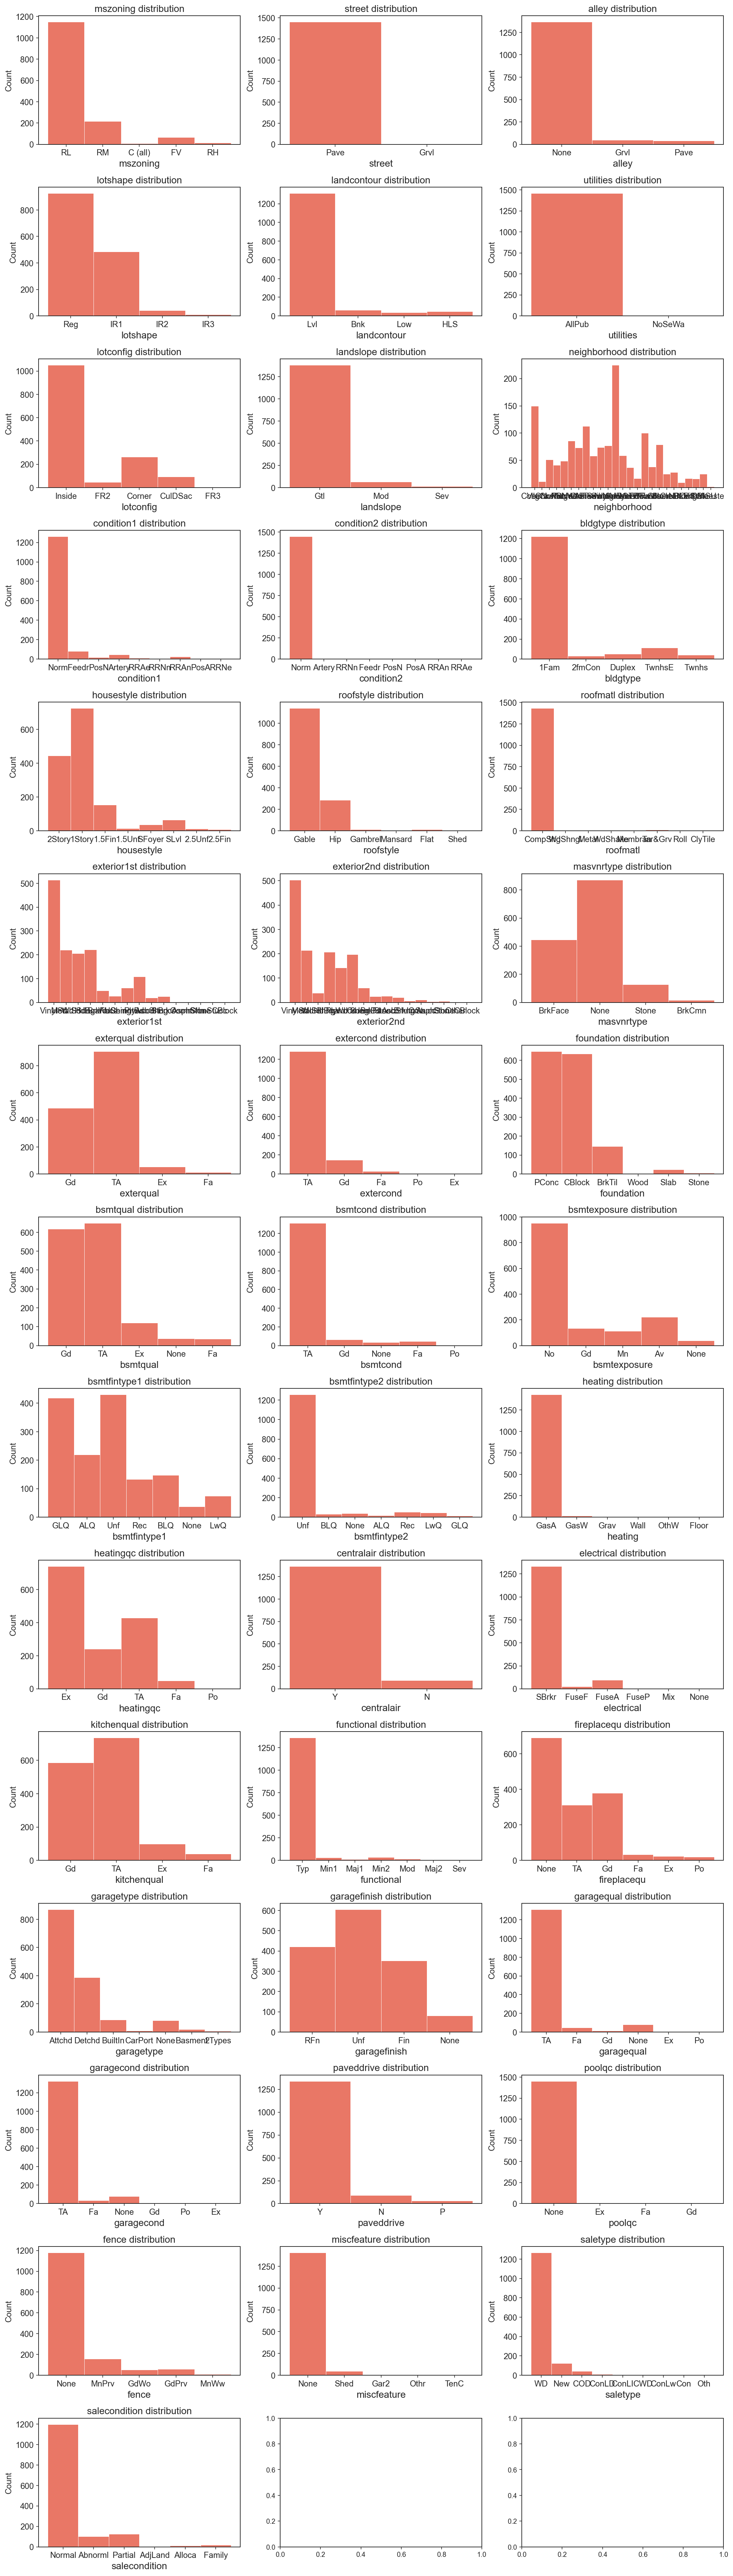

In [16]:
def subplot_histograms(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3)) 
    fig, axs = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows*3.5)) 
    axs = axs.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.histplot(dataframe[column], ax=axs[i], bins=15)
        axs[i].set_title(f'{column} distribution',fontsize=14)
        axs[i].tick_params(labelsize=12)
        axs[i].set_xlabel(column, fontsize=14)
    plt.tight_layout()
    
subplot_histograms(train_copy,col_categorical)

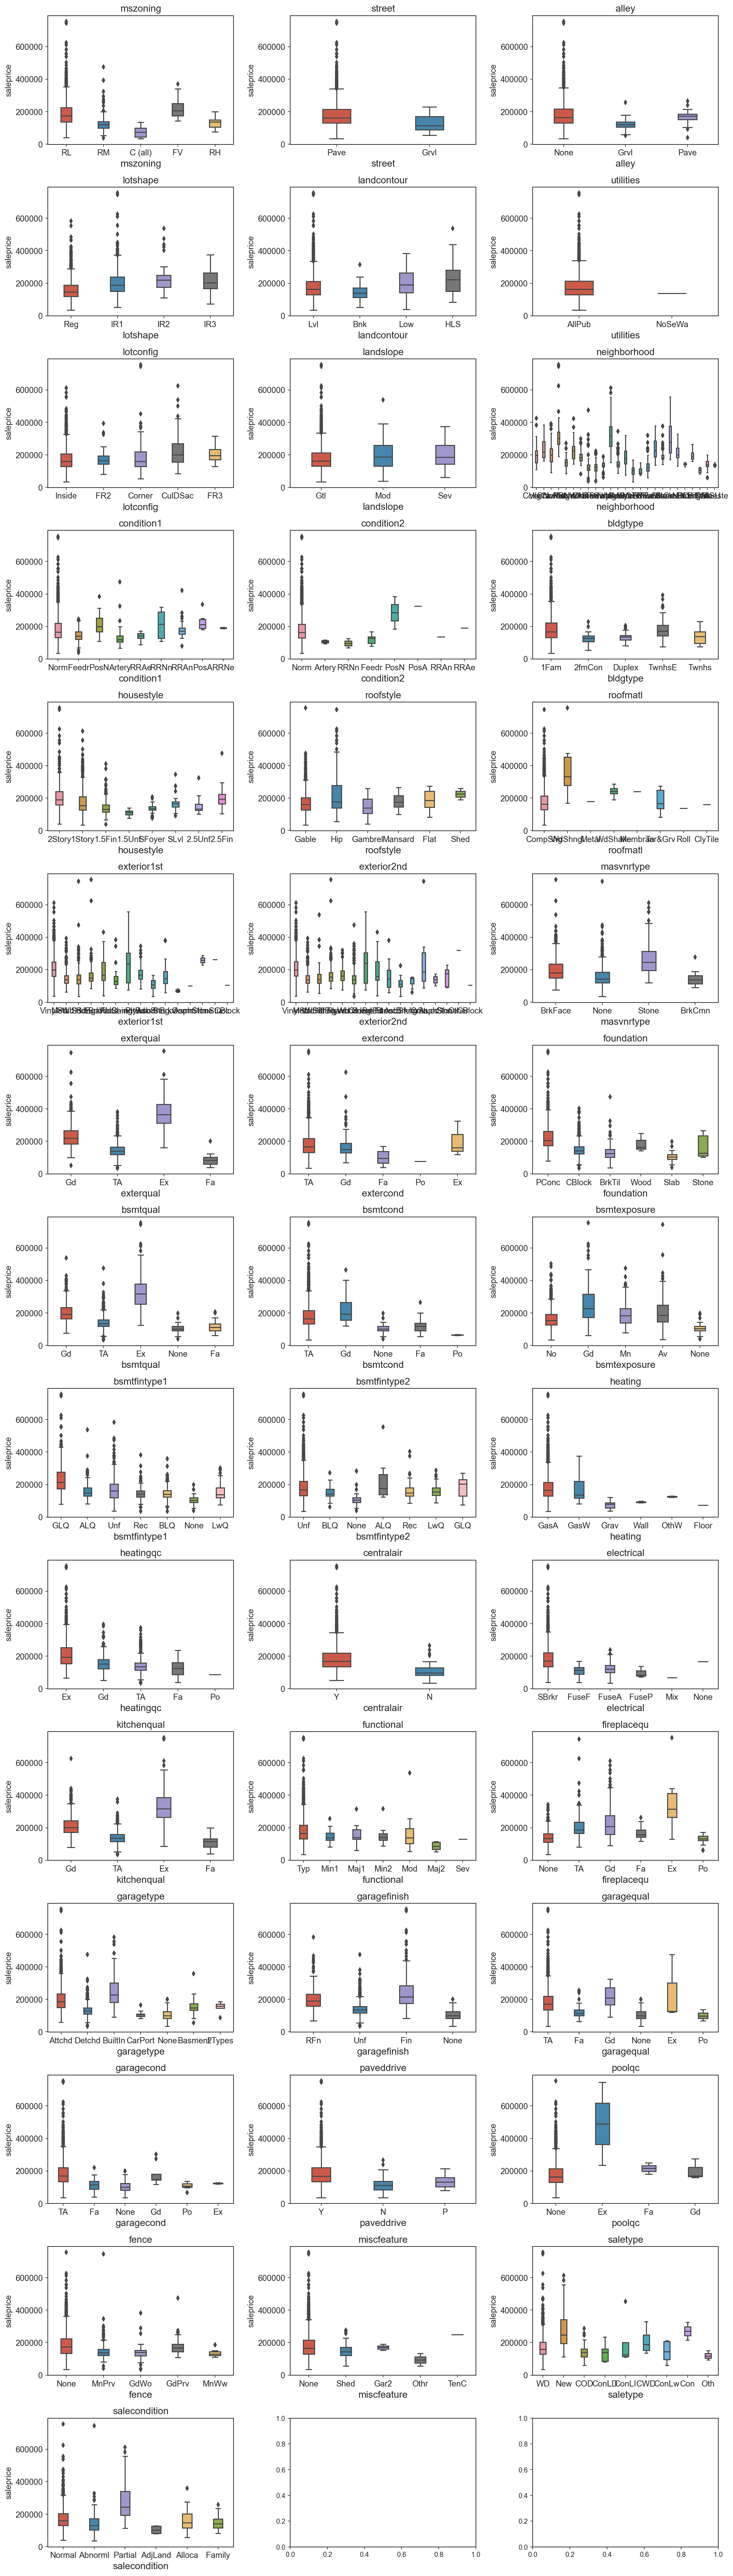

In [17]:
def subplot_box(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3)) 
    fig, axs = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows*3.5)) 
    axs = axs.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.boxplot(x=dataframe[column], y=dataframe.saleprice, width=0.3, ax=axs[i])
        axs[i].set_title(column, fontsize=14)  
        axs[i].tick_params(labelsize=12)
        axs[i].set_xlabel(column, fontsize=14)
    plt.tight_layout()
    
subplot_box(train_copy, col_categorical)

## Skewed features

The table below shows skewed features and their Fisher-Pearson coefficient of skewness.

In [18]:
from scipy.stats import skew

skewed = train_copy[col_numerical].apply(lambda x: skew(x.astype(float)))
skewed = skewed[skewed > 0.3]
skewed_df = pd.DataFrame({'skewed': skewed})
skewed_df.skewed.sort_values(ascending=False)

miscval          24.451640
poolarea         14.813135
lotarea          12.195142
3ssnporch        10.293752
lowqualfinsf      9.002080
kitchenabvgr      4.483784
bsmtfinsf2        4.250888
screenporch       4.117977
bsmthalfbath      4.099186
enclosedporch     3.086696
masvnrarea        2.674865
openporchsf       2.361912
saleprice         1.880941
bsmtfinsf1        1.683771
wooddecksf        1.539792
totalbsmtsf       1.522688
mssubclass        1.406210
1stflrsf          1.375342
grlivarea         1.365156
bsmtunfsf         0.919323
2ndflrsf          0.812194
overallcond       0.692355
totrmsabvgrd      0.675646
halfbath          0.675203
fireplaces        0.648898
bsmtfullbath      0.595454
Name: skewed, dtype: float64

# Closer examinations

Based on the distribution graphs above, several of the features needed a closer look in order to determine the appropriate feature engineering procedure.

## `landslope`
Since the number of houses with severe slopes is relatively small compared to those with moderate slopes, we will combine the severe slope category with the moderate slope category.

In [23]:
train_copy.landslope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: landslope, dtype: int64

## Exterior materials
Based on the analysis of the dataset, it appears that the majority of houses have only one type of exterior material. Additionally, for the few houses that have two types of exterior materials, the materials are often very similar or misspelled. As a result, during the feature engineering phase, we will remove the "exterior2nd" feature. We will also group the "exterior1st" feature into more general categories such as stone, cement, wood, metal, and others to simplify the dataset and improve the predictive power of the model.

In [19]:
# combining exterior1st and exterior 2nd if their materials are different
for index, val in enumerate(train_copy.exterior1st):
    if val != train_copy.loc[index, 'exterior2nd']:
        train_copy.loc[index, 'exterior'] = val + " / " + train_copy.loc[index, 'exterior2nd']
    else:
        train_copy.loc[index, 'exterior'] = val
        
pd.DataFrame(train_copy.exterior.value_counts()).head(40)

exterior
VinylSd                 502
MetalSd                 212
HdBoard                 193
Wd Sdng                 177
Plywood                  96
CemntBd / CmentBd        59
BrkFace                  24
HdBoard / Plywood        23
Stucco                   20
WdShing / Wd Shng        17
AsbShng                  17
BrkFace / Wd Sdng        12
Wd Sdng / Wd Shng         9
Wd Sdng / Plywood         8
BrkFace / Plywood         6
WdShing / Plywood         5
Plywood / Brk Cmn         5
VinylSd / Wd Shng         5
Stucco / Wd Shng          3
BrkFace / HdBoard         3
Wd Sdng / ImStucc         3
MetalSd / HdBoard         3
Plywood / ImStucc         3
HdBoard / ImStucc         2
Wd Sdng / VinylSd         2
WdShing / HdBoard         2
MetalSd / Wd Sdng         2
Plywood / Wd Sdng         2
Wd Sdng / HdBoard         2
AsbShng / Plywood         2
BrkComm / Brk Cmn         2
Plywood / HdBoard         2
VinylSd / Plywood         2
BrkFace / Stone           2
CBlock                    1
VinylSd / Wd Sdng         1
BrkFace / Stucco          1
ImStucc                   1
Stone                     1
HdBoard / MetalSd         1

## Porches
Most houses have 0sf of porch. Therefore houses with areas >0 for any porch will be combined into a single column indicating the presence of a porch.

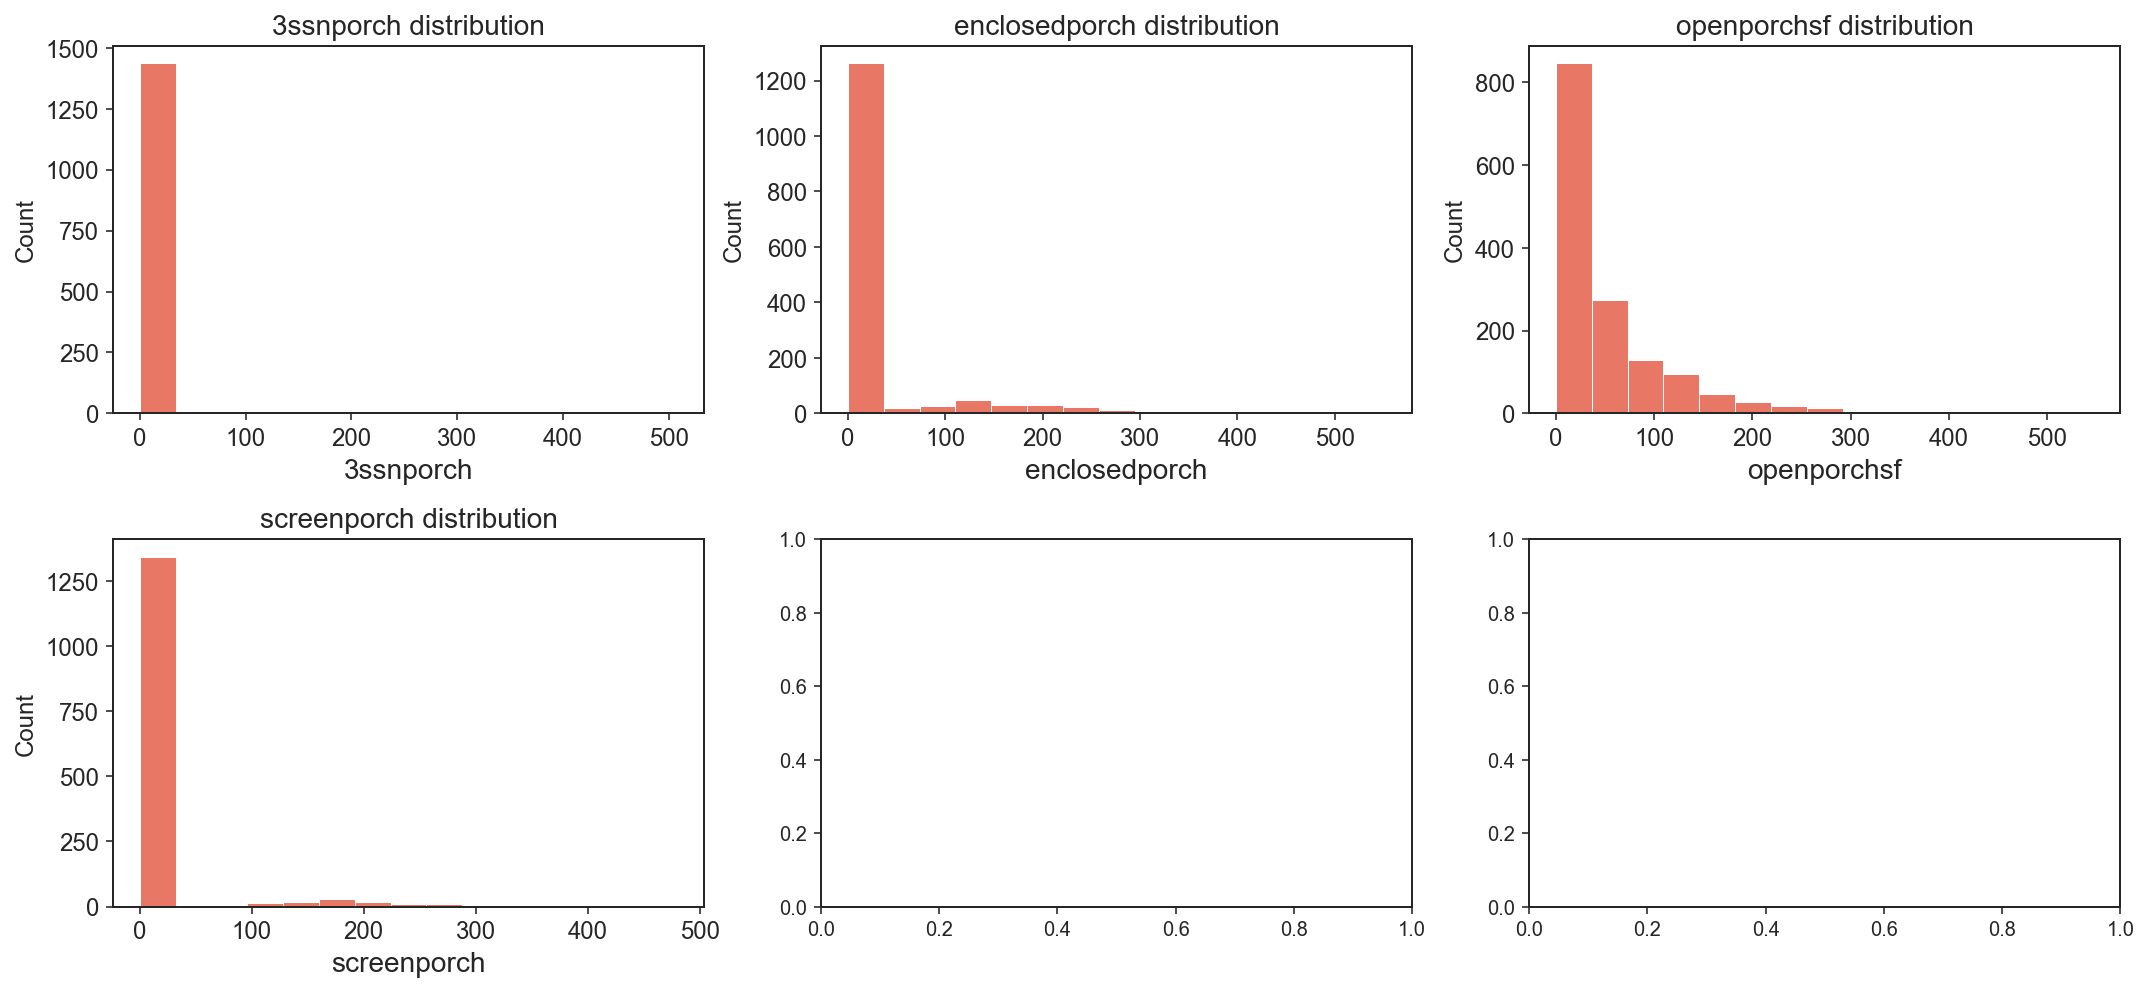

In [21]:
# check distribution of porch columns
col_porch = ['3ssnporch','enclosedporch','openporchsf','screenporch']
subplot_histograms(train_copy, col_porch)

# Correlations